### Load dataset

In [312]:
import pandas as pd
df = pd.read_csv('Bank Data.csv')

In [313]:
print(f'Number of rows: {df.shape[0]}')
print(f'Number of columns: {df.shape[1]}')

Number of rows: 50000
Number of columns: 27


In [314]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,...,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923


In [315]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance'],
      dtype='object')

### Target variable: `Credit_Mix'

In [316]:
features = [
    'Outstanding_Debt',
    'Credit_Utilization_Ratio',
    'Num_of_Loan',
    'Delay_from_due_date',
    'Num_of_Delayed_Payment',
    'Credit_History_Age',
    'Payment_of_Min_Amount',
    'Num_Credit_Inquiries',
    'Total_EMI_per_month',
    'Payment_Behaviour'
]

target = 'Credit_Mix'

Exploratory Data Analysis (EDA)

In [317]:
import matplotlib.pyplot as plt
import seaborn as sns

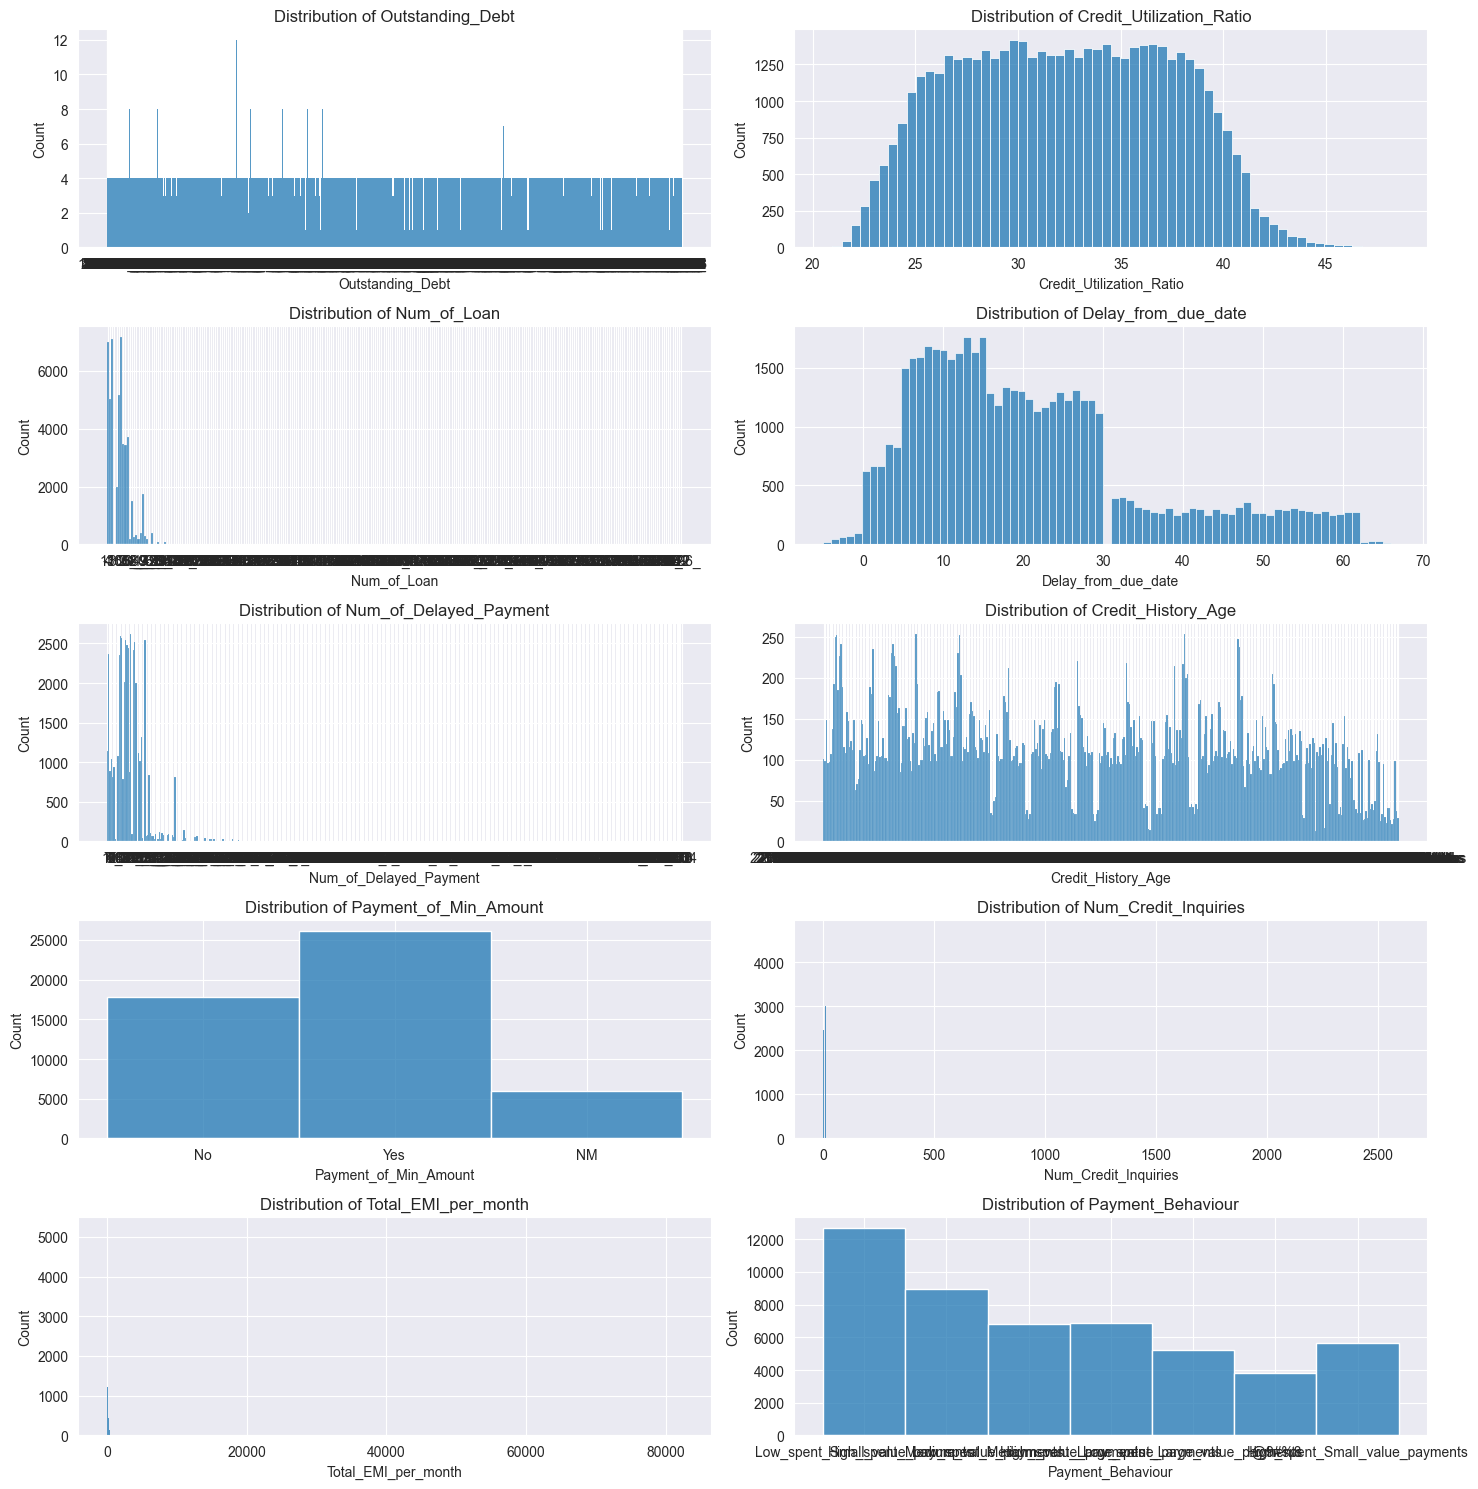

In [318]:
# distribution of features
fig, axes = plt.subplots(5, 2, figsize=(15, 15))
for i, feature in enumerate(features):
    sns.histplot(df[feature], ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'Distribution of {feature}')
    
plt.tight_layout()
plt.show()

In [319]:
df[features].head()

,Outstanding_Debt,Credit_Utilization_Ratio,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Credit_History_Age,Payment_of_Min_Amount,Num_Credit_Inquiries,Total_EMI_per_month,Payment_Behaviour
0,809.98,35.030402,4,3,7,22 Years and 9 Months,No,2022.0,49.574949,Low_spent_Small_value_payments
1,809.98,33.053114,4,3,9,22 Years and 10 Months,No,4.0,49.574949,High_spent_Medium_value_payments
2,809.98,33.811894,4,-1,4,NaN,No,4.0,49.574949,Low_spent_Medium_value_payments
3,809.98,32.430559,4,4,5,23 Years and 0 Months,No,4.0,49.574949,High_spent_Medium_value_payments
4,605.03,25.926822,1,3,1,27 Years and 3 Months,No,5.0,18.816215,High_spent_Large_value_payments


### Check feature data types

In [320]:
df[features].dtypes

Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Num_of_Loan                  object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Credit_History_Age           object
Payment_of_Min_Amount        object
Num_Credit_Inquiries        float64
Total_EMI_per_month         float64
Payment_Behaviour            object
dtype: object

### Check for missing values

In [321]:
df[features].isnull().sum()

Outstanding_Debt               0
Credit_Utilization_Ratio       0
Num_of_Loan                    0
Delay_from_due_date            0
Num_of_Delayed_Payment      3498
Credit_History_Age          4470
Payment_of_Min_Amount          0
Num_Credit_Inquiries        1035
Total_EMI_per_month            0
Payment_Behaviour              0
dtype: int64

### Feature: `Outstanding_Debt'

In [322]:
# convert to numeric
df['Outstanding_Debt'] = df['Outstanding_Debt'].str.replace('_', '').astype(float)

In [323]:
# Scale the feature
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['Outstanding_Debt'] = scaler.fit_transform(df['Outstanding_Debt'].values.reshape(-1, 1))

### Feature: `Num_of_Loan'

In [324]:
# convert to numeric
df['Num_of_Loan'] = df['Num_of_Loan'].str.replace('_', '').astype(int)

In [325]:
# Scale the feature
df['Num_of_Loan'] = scaler.fit_transform(df['Num_of_Loan'].values.reshape(-1, 1))

### Feature: `Num_of_Delayed_Payment'

In [326]:
df['Num_of_Delayed_Payment']

0          7
1          9
2          4
3          5
4          1
        ... 
49995     25
49996    NaN
49997      5
49998     6_
49999      5
Name: Num_of_Delayed_Payment, Length: 50000, dtype: object

In [327]:
# convert to numeric
df['Num_of_Delayed_Payment'] = pd.to_numeric(df['Num_of_Delayed_Payment'], errors='coerce')
# fill missing values with median as Num_of_Delayed_Payment is positively skewed
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].fillna(df['Num_of_Delayed_Payment'].median())

In [328]:
# Scale the feature
df['Num_of_Delayed_Payment'] = scaler.fit_transform(df['Num_of_Delayed_Payment'].values.reshape(-1, 1))

### Feature: `Credit_History_Age'

In [329]:
import re
import numpy as np

# Function to convert Credit History Age from string to months
def convert_to_months(age_str):
    if pd.isnull(age_str):
        return np.nan
    match = re.match(r"(\d+) Years and (\d+) Months", age_str)
    if match:
        years = int(match.group(1))
        months = int(match.group(2))
        return (years * 12) + months
    return np.nan

# Apply conversion to the column
df['Credit_History_Age'] = df['Credit_History_Age'].apply(convert_to_months)

# df['Credit_History_Age'].head()

# Impute missing values with median
# df['Credit_History_Age'].fillna(df['Credit_History_Age'].median(), inplace=True)

# Fill missing values with mean as Credit_History_Age is normally distributed
df['Credit_History_Age'] = df['Credit_History_Age'].fillna(df['Credit_History_Age'].mean())

In [330]:
# Scale the feature
df['Credit_History_Age'] = scaler.fit_transform(df['Credit_History_Age'].values.reshape(-1, 1))

### Feature: `Payment_of_Min_Amount'

In [331]:
# encode as binary
df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].map({'Yes': 1, 'No': 0})
# fill missing values with mode
df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].fillna(df['Payment_of_Min_Amount'].mode()[0])
df['Payment_of_Min_Amount'].value_counts()

Payment_of_Min_Amount
1.0    32151
0.0    17849
Name: count, dtype: int64

### Feature: `Num_of_Credit_Inquiries'

In [332]:
# fill missing values with median
df['Num_Credit_Inquiries'] = df['Num_Credit_Inquiries'].fillna(df['Num_Credit_Inquiries'].median())

In [333]:
# Scale the feature
df['Num_Credit_Inquiries'] = scaler.fit_transform(df['Num_Credit_Inquiries'].values.reshape(-1, 1))

### Feature: `Payment_Behaviour'

In [334]:
df['Payment_Behaviour'].unique()

array(['Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments',
       'Low_spent_Medium_value_payments',
       'High_spent_Large_value_payments',
       'Low_spent_Large_value_payments', '!@9#%8',
       'High_spent_Small_value_payments'], dtype=object)

In [335]:
df['Payment_Behaviour'].value_counts()

Payment_Behaviour
Low_spent_Small_value_payments      12694
High_spent_Medium_value_payments     8922
High_spent_Large_value_payments      6844
Low_spent_Medium_value_payments      6837
High_spent_Small_value_payments      5651
Low_spent_Large_value_payments       5252
!@9#%8                               3800
Name: count, dtype: int64

In [336]:
# replace gibberish !@9#%8 with NaN
df['Payment_Behaviour'] = df['Payment_Behaviour'].replace('!@9#%8', np.nan)

In [337]:
# fill missing values with mode
df['Payment_Behaviour'] = df['Payment_Behaviour'].fillna(df['Payment_Behaviour'].mode()[0])
df['Payment_Behaviour'].value_counts()

Payment_Behaviour
Low_spent_Small_value_payments      16494
High_spent_Medium_value_payments     8922
High_spent_Large_value_payments      6844
Low_spent_Medium_value_payments      6837
High_spent_Small_value_payments      5651
Low_spent_Large_value_payments       5252
Name: count, dtype: int64

In [338]:
# encode as categorical
# Low_spent_Small_value_payments = 0
# Low_spent_Medium_value_payments = 1
# Low_spent_Large_value_payments = 2
# High_spent_Small_value_payments = 3
# High_spent_Medium_value_payments = 4
# High_spent_Large_value_payments = 5

df['Payment_Behaviour'] = df['Payment_Behaviour'].map({
    'Low_spent_Small_value_payments': 0,
    'Low_spent_Medium_value_payments': 1,
    'Low_spent_Large_value_payments': 2,
    'High_spent_Small_value_payments': 3,
    'High_spent_Medium_value_payments': 4,
    'High_spent_Large_value_payments': 5
})

In [339]:
df['Payment_Behaviour'].value_counts()

Payment_Behaviour
0    16494
4     8922
5     6844
1     6837
3     5651
2     5252
Name: count, dtype: int64

### Distribution of target variable

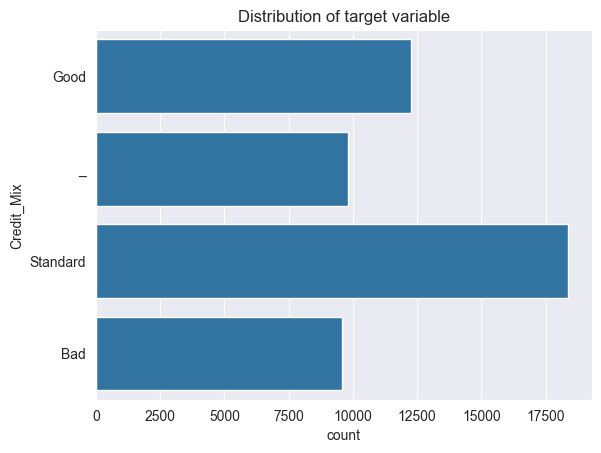

In [340]:
sns.countplot(df[target])
plt.title('Distribution of target variable')
plt.show()

In [341]:
# replace _ with NaN in target variable
df[target] = df[target].replace('_', np.nan)
# fill missing values with mode
df[target] = df[target].fillna(df[target].mode()[0])

In [342]:
df[target].value_counts()

Credit_Mix
Standard    28184
Good        12260
Bad          9556
Name: count, dtype: int64

# Select Logistic Regression as the model

In [343]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# Initialize the model
model = LogisticRegression(verbose=True)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('\nClassification Report:')
print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           33     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.09861D+00    |proj g|=  3.56386D+02


 This problem is unconstrained.



At iterate   50    f=  8.14384D-01    |proj g|=  1.04416D+01

At iterate  100    f=  7.48343D-01    |proj g|=  5.97128D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   33    100    124      1     0     0   5.971D+00   7.483D-01
  F =  0.74834270714900086     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Confusion Matrix:
[[ 902    0 1018]
 [   0 1042 1416]
 [ 406  723 4493]]

Classification Report:
              precision    recall  f1-score   support

         Bad       0.69      0.47      0.56      1920
        Good       0.59      0.42      0.49      2458
    Standard       0.65      0.80      

/Users/parthokr/Documents/Projects/dip/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Use Random Forest Classifier

In [347]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

print('\nClassification Report:')
print(classification_report(y_test, y_pred))

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')


Confusion Matrix:
[[1703    0  217]
 [   0 2096  362]
 [ 451  692 4479]]

Classification Report:
              precision    recall  f1-score   support

         Bad       0.79      0.89      0.84      1920
        Good       0.75      0.85      0.80      2458
    Standard       0.89      0.80      0.84      5622

    accuracy                           0.83     10000
   macro avg       0.81      0.85      0.82     10000
weighted avg       0.83      0.83      0.83     10000

Accuracy: 0.8278


### Hyperparameter tuning using GridSearchCV

In [350]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, 40, 50]
}

# Initialize the model
model = RandomForestClassifier(random_state=42, verbose=2)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Train the model
grid_search.fit(X_train, y_train)

# Make predictions
y_pred = grid_search.predict(X_test)

# Evaluate the model
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

print('\nClassification Report:')
print(classification_report(y_test, y_pred))

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

# Get the best parameters
print(f'Best parameters: {grid_search.best_params_}')

Fitting 3 folds for each of 15 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    1.0s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    1.0s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    1.0s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    1.0s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    1.0s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    1.1s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    1.1s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    1.1s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    1.0s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    1.6s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    4.2s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    4.2s
[Parallel(n_jobs=1)]: Do

building tree 1 of 200
building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
b

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.2s
/Users/parthokr/Documents/Projects/dip/.venv/lib/python3.11/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


building tree 1 of 300
building tree 2 of 300
building tree 3 of 300
building tree 4 of 300
building tree 5 of 300
building tree 6 of 300
building tree 7 of 300
building tree 8 of 300
building tree 9 of 300
building tree 10 of 300
building tree 11 of 300
building tree 12 of 300
building tree 13 of 300
building tree 14 of 300
building tree 15 of 300
building tree 16 of 300
building tree 17 of 300
building tree 18 of 300
building tree 19 of 300
building tree 20 of 300
building tree 21 of 300
building tree 22 of 300
building tree 23 of 300
building tree 24 of 300
building tree 25 of 300
building tree 26 of 300
building tree 27 of 300
building tree 28 of 300
building tree 29 of 300
building tree 30 of 300
building tree 31 of 300
building tree 32 of 300
building tree 33 of 300
building tree 34 of 300
building tree 35 of 300
building tree 36 of 300
building tree 37 of 300
building tree 38 of 300
building tree 39 of 300
building tree 40 of 300


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    2.2s


building tree 41 of 300
building tree 42 of 300
building tree 43 of 300
building tree 44 of 300
building tree 45 of 300
building tree 46 of 300
building tree 47 of 300
building tree 48 of 300
building tree 49 of 300
building tree 50 of 300
building tree 51 of 300
building tree 52 of 300
building tree 53 of 300
building tree 54 of 300
building tree 55 of 300
building tree 56 of 300
building tree 57 of 300
building tree 58 of 300
building tree 59 of 300
building tree 60 of 300
building tree 61 of 300
building tree 62 of 300
building tree 63 of 300
building tree 64 of 300
building tree 65 of 300
building tree 66 of 300
building tree 67 of 300
building tree 68 of 300
building tree 69 of 300
building tree 70 of 300
building tree 71 of 300
building tree 72 of 300
building tree 73 of 300
building tree 74 of 300
building tree 75 of 300
building tree 76 of 300
building tree 77 of 300
building tree 78 of 300
building tree 79 of 300
building tree 80 of 300
building tree 81 of 300
building tree 82

[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    9.0s


building tree 165 of 300
building tree 166 of 300
building tree 167 of 300
building tree 168 of 300
building tree 169 of 300
building tree 170 of 300
building tree 171 of 300
building tree 172 of 300
building tree 173 of 300
building tree 174 of 300
building tree 175 of 300
building tree 176 of 300
building tree 177 of 300
building tree 178 of 300
building tree 179 of 300
building tree 180 of 300
building tree 181 of 300
building tree 182 of 300
building tree 183 of 300
building tree 184 of 300
building tree 185 of 300
building tree 186 of 300
building tree 187 of 300
building tree 188 of 300
building tree 189 of 300
building tree 190 of 300
building tree 191 of 300
building tree 192 of 300
building tree 193 of 300
building tree 194 of 300
building tree 195 of 300
building tree 196 of 300
building tree 197 of 300
building tree 198 of 300
building tree 199 of 300
building tree 200 of 300
building tree 201 of 300
building tree 202 of 300
building tree 203 of 300
building tree 204 of 300


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.2s


Confusion Matrix:
[[1701    0  219]
 [   0 2091  367]
 [ 459  683 4480]]

Classification Report:
              precision    recall  f1-score   support

         Bad       0.79      0.89      0.83      1920
        Good       0.75      0.85      0.80      2458
    Standard       0.88      0.80      0.84      5622

    accuracy                           0.83     10000
   macro avg       0.81      0.84      0.82     10000
weighted avg       0.83      0.83      0.83     10000

Accuracy: 0.8272
Best parameters: {'max_depth': 50, 'n_estimators': 300}
